In [190]:
#pip install --upgrade scikit-learn

  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\jesus\\anaconda3\\lib\\site-packages\\~klearn\\datasets\\_svmlight_format.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
#pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [39]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
#Modules for training data
from sklearn.model_selection import train_test_split
#Tree modules
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image 
import pydotplus
#Naive Bayes Module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.calibration import CalibratedClassifierCV
import sklearn.inspection

In [3]:
raw_prod = pd.read_csv("products.csv")

In [37]:
raw_prod.loc[4,"product_description"]

'24g of Pure, Quality Protein in Every Scoop with No Added Amino Acids or Filler Nutrients'

In [5]:
raw_prod.columns

Index(['average_flavor_rating', 'brand_name', 'link', 'number_of_flavors',
       'number_of_reviews', 'overall_rating', 'price', 'price_per_serving',
       'product_category', 'product_description', 'product_name',
       'top_flavor_rated', 'verified_buyer_number', 'verified_buyer_rating'],
      dtype='object')

In [4]:
#Cleaning columns only to keep those with the desired variables and with complete information
raw_prod.drop(['average_flavor_rating', 'link', 'number_of_reviews', 'price_per_serving', 'product_name', 'top_flavor_rated', 'verified_buyer_number', 'verified_buyer_rating'], axis = 1, inplace = True)

In [5]:
#Dropping columns without complete values
raw_prod.dropna(inplace = True)

In [6]:
#Final PreData
raw_prod

,brand_name,number_of_flavors,overall_rating,price,product_category,product_description
0,EVLUTION NUTRITION,29.0,9.4,19.99,BCAAs,BCAA Powder with Natural Energizers Sourced fr...
1,Optimum Nutrition,43.0,9.3,57.99,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscl...
2,JYM Supplement Science,9.0,9.1,48.99,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-H...
4,JYM Supplement Science,14.0,9.2,56.98,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop wi..."
7,EVLUTION NUTRITION,6.0,9.3,34.99,Betaine Anhydrous,Advanced Pre-Workout + Weight Management
...,...,...,...,...,...,...
819,Ascent,2.0,8.8,47.18,Micellar Casein Protein,Slow And Sustained Release To Keep Muscles Fed...
824,Cellucor,10.0,9.4,16.99,Beta-Alanine,"Pre-Mix Pre-Workout for Energy, Focus and Ulti..."
825,Ascent,4.0,9.6,75.80,Whey Protein Isolate,Made with Zero Artificial Ingredients and Nati...
826,Isopure,2.0,8.4,41.07,Whey Protein Isolate,Natural!


In [7]:
raw_prod["label"] = raw_prod["overall_rating"].map(lambda x: 1 if x >= 9 else 0) 

In [8]:
raw_prod["label"].value_counts()

1    184
0    119
Name: label, dtype: int64

In [9]:
raw_prod

,brand_name,number_of_flavors,overall_rating,price,product_category,product_description,label
0,EVLUTION NUTRITION,29.0,9.4,19.99,BCAAs,BCAA Powder with Natural Energizers Sourced fr...,1
1,Optimum Nutrition,43.0,9.3,57.99,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscl...,1
2,JYM Supplement Science,9.0,9.1,48.99,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-H...,1
4,JYM Supplement Science,14.0,9.2,56.98,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop wi...",1
7,EVLUTION NUTRITION,6.0,9.3,34.99,Betaine Anhydrous,Advanced Pre-Workout + Weight Management,1
...,...,...,...,...,...,...,...
819,Ascent,2.0,8.8,47.18,Micellar Casein Protein,Slow And Sustained Release To Keep Muscles Fed...,0
824,Cellucor,10.0,9.4,16.99,Beta-Alanine,"Pre-Mix Pre-Workout for Energy, Focus and Ulti...",1
825,Ascent,4.0,9.6,75.80,Whey Protein Isolate,Made with Zero Artificial Ingredients and Nati...,1
826,Isopure,2.0,8.4,41.07,Whey Protein Isolate,Natural!,0


# Decision Tree

In [10]:
#Columns for the Decision Tree
dt_prod = raw_prod.copy()
dt_prod.drop(["overall_rating", "product_description"], axis = 1, inplace = True)

In [11]:
dt_prod

,brand_name,number_of_flavors,price,product_category,label
0,EVLUTION NUTRITION,29.0,19.99,BCAAs,1
1,Optimum Nutrition,43.0,57.99,Build Muscle Products,1
2,JYM Supplement Science,9.0,48.99,Improve Workout Products,1
4,JYM Supplement Science,14.0,56.98,Whey Protein Isolate,1
7,EVLUTION NUTRITION,6.0,34.99,Betaine Anhydrous,1
...,...,...,...,...,...
819,Ascent,2.0,47.18,Micellar Casein Protein,0
824,Cellucor,10.0,16.99,Beta-Alanine,1
825,Ascent,4.0,75.80,Whey Protein Isolate,1
826,Isopure,2.0,41.07,Whey Protein Isolate,0


In [12]:
#One_hot
onehot_brand = pd.get_dummies(dt_prod["brand_name"], prefix = "Brand: ")
onehot_category = pd.get_dummies(dt_prod["product_category"], prefix = "Category: ")
dt_prod = dt_prod.join(onehot_brand)
dt_prod = dt_prod.join(onehot_category)
dt_prod.columns

Index(['brand_name', 'number_of_flavors', 'price', 'product_category', 'label',
       'Brand: _ABB', 'Brand: _AST', 'Brand: _AllMax Nutrition',
       'Brand: _Animal', 'Brand: _Ascent', 'Brand: _BSN',
       'Brand: _Beast Sports Nutrition', 'Brand: _Betancourt Nutrition',
       'Brand: _Beverly International', 'Brand: _Body Nutrition',
       'Brand: _Bodybuilding.com Signature', 'Brand: _COBRA LABS',
       'Brand: _Cellucor', 'Brand: _Celsius', 'Brand: _Core Nutritionals',
       'Brand: _CytoSport', 'Brand: _Dymatize', 'Brand: _EFX Sports',
       'Brand: _EVLUTION NUTRITION', 'Brand: _FINAFLEX', 'Brand: _GAT',
       'Brand: _Gamma Labs', 'Brand: _Garden Of Life',
       'Brand: _Gaspari Nutrition', 'Brand: _Grenade', 'Brand: _Isopure',
       'Brand: _JYM Supplement Science', 'Brand: _Kaged Muscle',
       'Brand: _Labrada', 'Brand: _Lenny & Larry's', 'Brand: _MET-Rx',
       'Brand: _MHP', 'Brand: _MRM', 'Brand: _Magnum Nutraceuticals',
       'Brand: _Muscle Beach Nutrition'

In [13]:
#Creating the training data for the decision tree
dt_feature_cols = ['number_of_flavors', 'price','Brand: _ABB', 'Brand: _AST', 'Brand: _AllMax Nutrition',
       'Brand: _Animal', 'Brand: _Ascent', 'Brand: _BSN',
       'Brand: _Beast Sports Nutrition', 'Brand: _Betancourt Nutrition',
       'Brand: _Beverly International', 'Brand: _Body Nutrition',
       'Brand: _Bodybuilding.com Signature', 'Brand: _COBRA LABS',
       'Brand: _Cellucor', 'Brand: _Celsius', 'Brand: _Core Nutritionals',
       'Brand: _CytoSport', 'Brand: _Dymatize', 'Brand: _EFX Sports',
       'Brand: _EVLUTION NUTRITION', 'Brand: _FINAFLEX', 'Brand: _GAT',
       'Brand: _Gamma Labs', 'Brand: _Garden Of Life',
       'Brand: _Gaspari Nutrition', 'Brand: _Grenade', 'Brand: _Isopure',
       'Brand: _JYM Supplement Science', 'Brand: _Kaged Muscle',
       'Brand: _Labrada', '''Brand: _Lenny & Larry's''', 'Brand: _MET-Rx',
       'Brand: _MHP', 'Brand: _MRM', 'Brand: _Magnum Nutraceuticals',
       'Brand: _Muscle Beach Nutrition', 'Brand: _Muscle Milk',
       'Brand: _MuscleMeds', 'Brand: _MuscleTech', 'Brand: _NLA for Her',
       'Brand: _NOW', 'Brand: _NutraBio', 'Brand: _ONE',
       'Brand: _OhYeah! Nutrition', 'Brand: _Optimum Nutrition',
       'Brand: _PEScience', 'Brand: _PrimaForce', 'Brand: _Pro Supps',
       'Brand: _Quest Nutrition', 'Brand: _RSP Nutrition', 'Brand: _S.A.N.',
       'Brand: _Six Star Pro Nutrition', 'Brand: _Sports Research',
       'Brand: _Top Secret Nutrition', 'Brand: _Universal Nutrition',
       'Brand: _Vega', 'Brand: _eFlow Nutrition', 'Brand: _iForce Nutrition',
       'Brand: _iSatori', 'Category: _Agmatine', 'Category: _Amino Acids',
       'Category: _BCAAs', 'Category: _Beef Protein',
       'Category: _Beta-Alanine', 'Category: _Betaine Anhydrous',
       'Category: _Build Muscle Products', 'Category: _Caffeine',
       'Category: _Carbohydrates', 'Category: _Citrulline',
       'Category: _Collagen', 'Category: _Creatine', 'Category: _Creatine HCl',
       'Category: _Creatine Malate', 'Category: _Creatine Monohydrate',
       'Category: _D-Aspartic Acid', 'Category: _Egg Protein',
       'Category: _GABA', 'Category: _Glutamine',
       'Category: _Green Coffee Extract', 'Category: _Green Tea',
       'Category: _Hydrolyzed Whey Protein',
       'Category: _Improve Workout Products', 'Category: _Kre-Alkalyn',
       'Category: _L-Arginine', 'Category: _L-Taurine',
       'Category: _Micellar Casein Protein', 'Category: _Plant Protein',
       'Category: _Protein', 'Category: _Waxy Maize',
       'Category: _Weight Loss Products', 'Category: _Whey Protein',
       'Category: _Whey Protein Blends', 'Category: _Whey Protein Concentrate',
       'Category: _Whey Protein Isolate', 'Category: _Yerba Mate']
dt_X = dt_prod[dt_feature_cols]
dt_Y = dt_prod.label


In [14]:
#Building the training dataset

X_train, X_test, Y_train, Y_test = train_test_split(dt_X, dt_Y, test_size = 0.3, random_state = 1996)




In [18]:
#Decision Tree (If reset, run above before)
#Summoning Machine
#Criterion and Max_Depth
tree_prod = DecisionTreeClassifier(random_state = 1996) 

#Fitting the data
tree_prod = tree_prod.fit(X_train, Y_train)

#Predicting the response for test dataset
Y_pred = tree_prod.predict(X_test)


In [19]:
#Checking accuracy for products with review higher than 9
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.6813186813186813


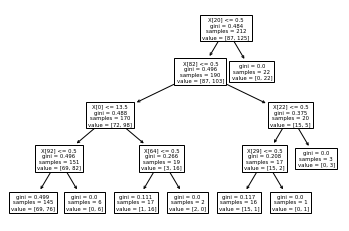

In [17]:
tree.plot_tree(tree_prod)
plt.show()

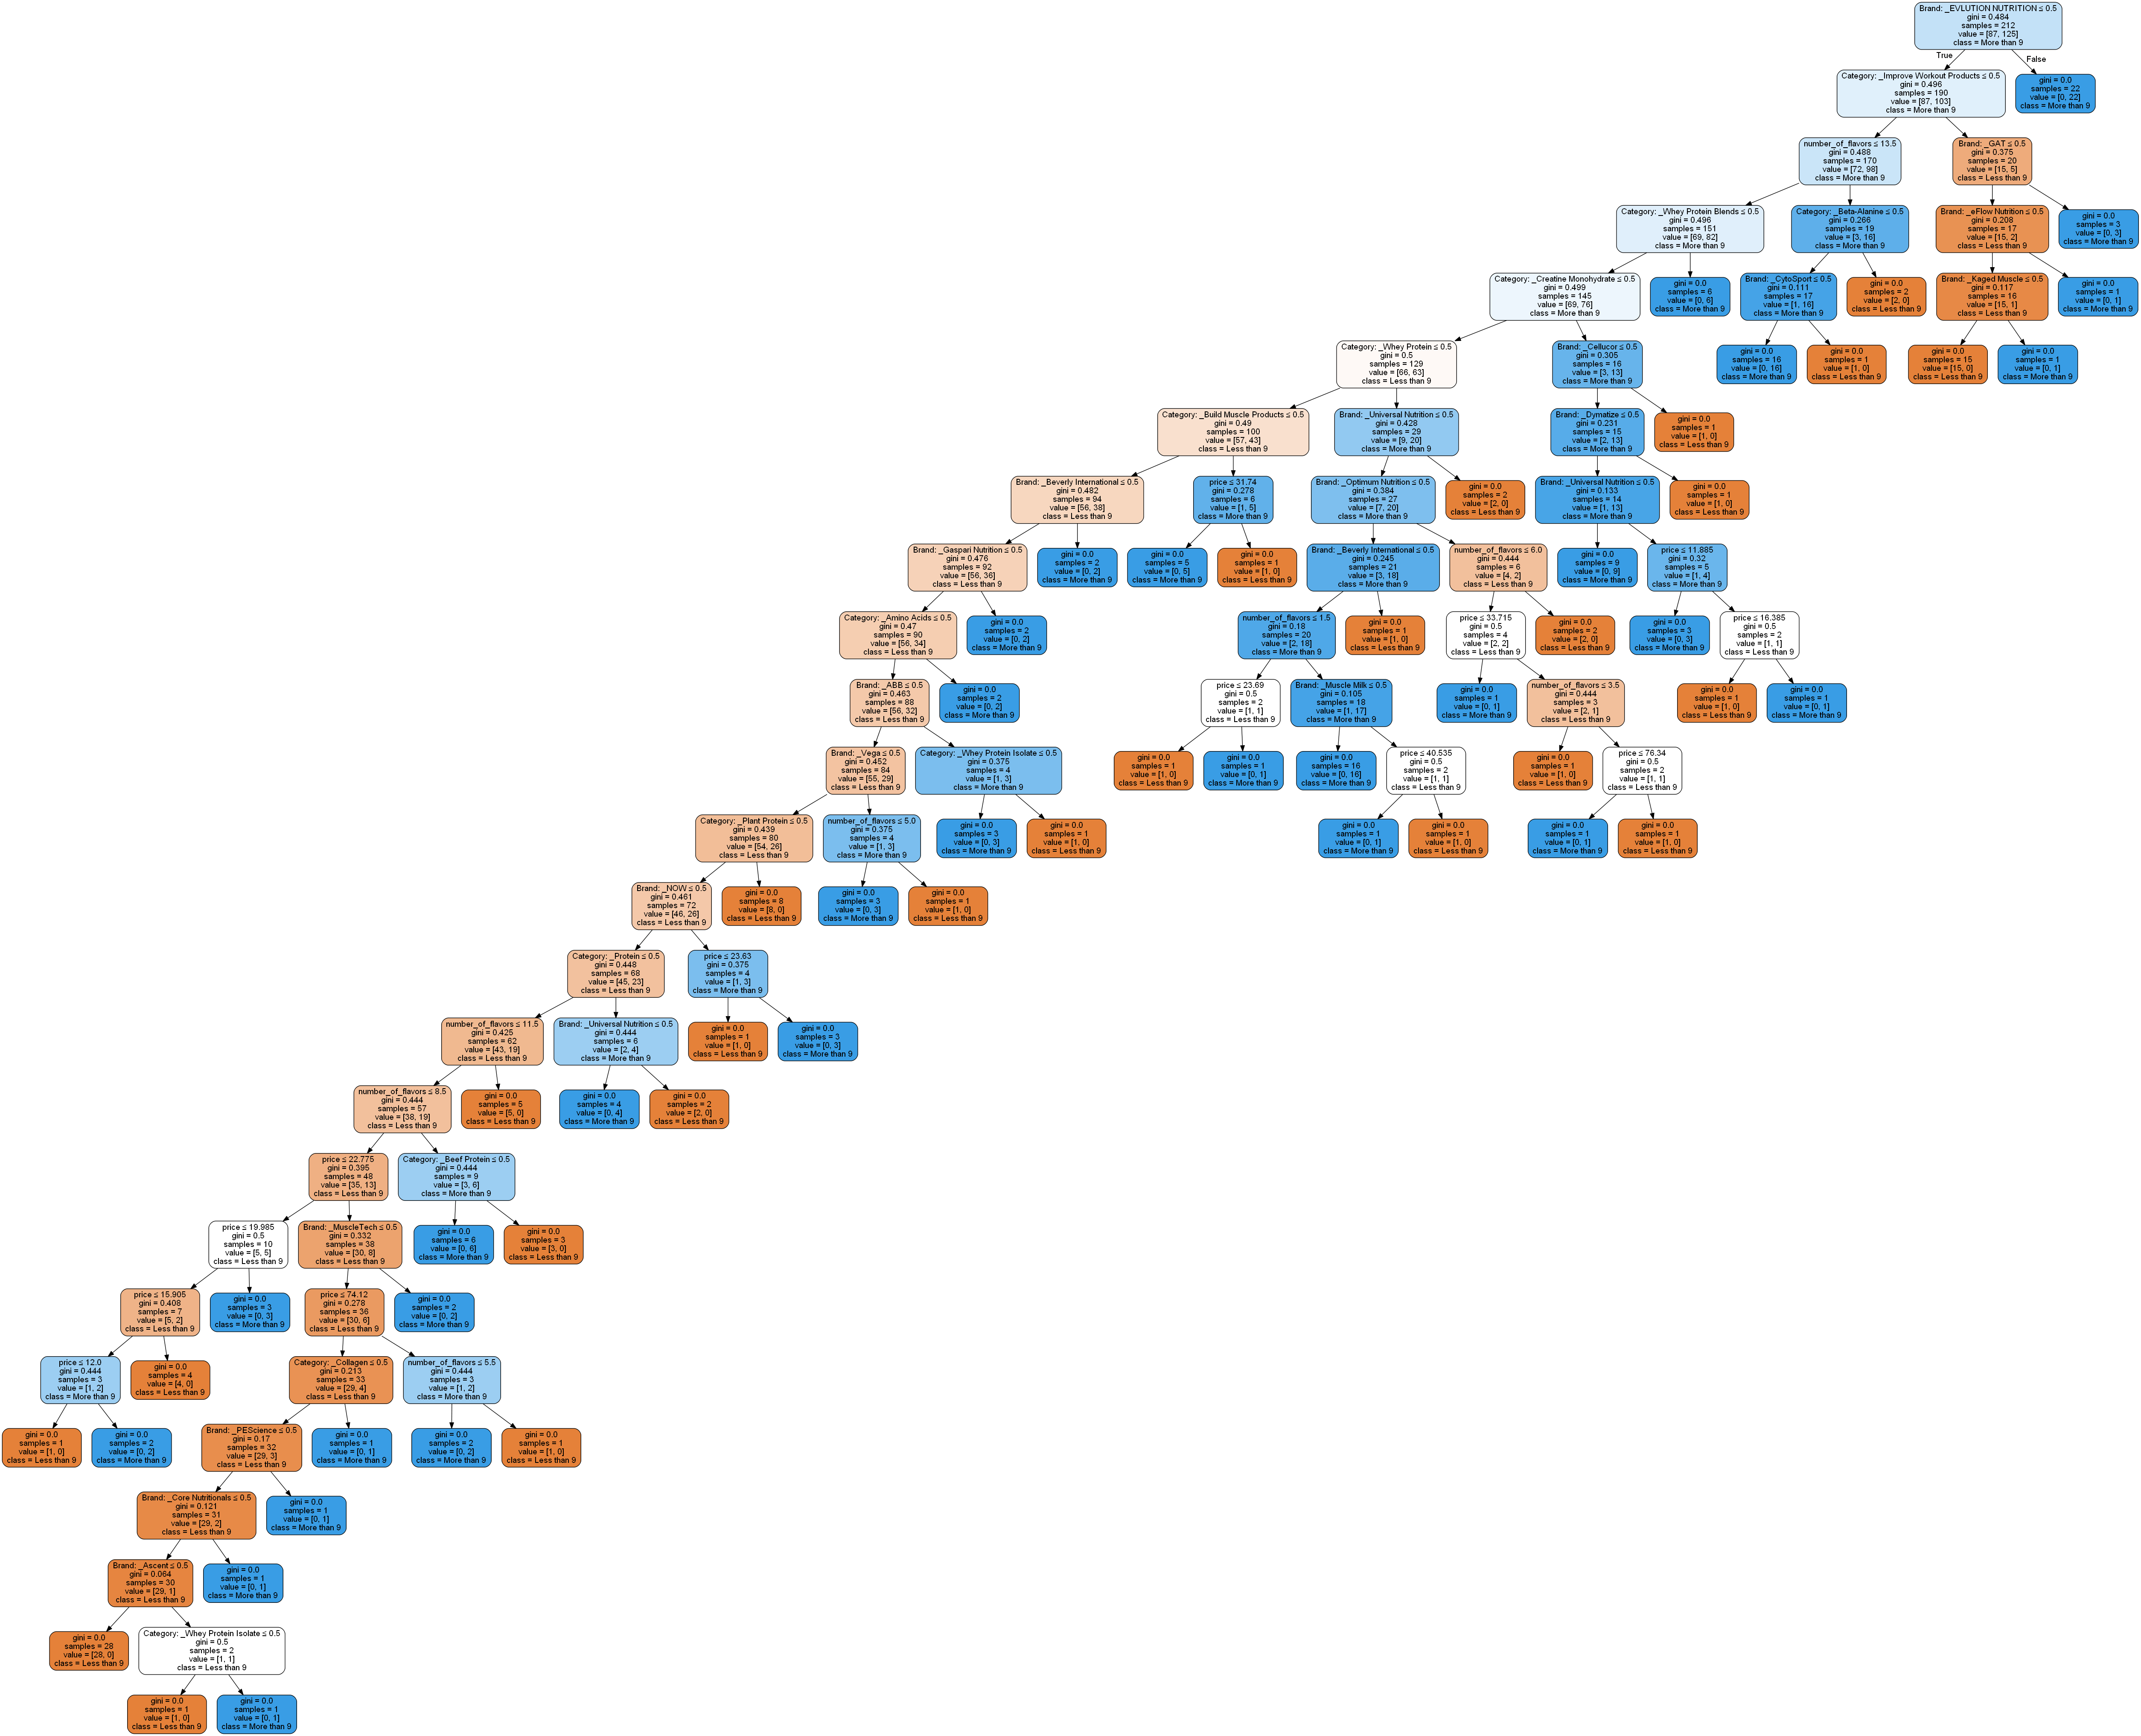

In [20]:
dot_data = StringIO()
export_graphviz(tree_prod, out_file = dot_data, filled = True, rounded = True,
               special_characters = True, feature_names = dt_feature_cols, 
                class_names = ["Less than 9", "More than 9"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Products_large.png")
Image(graph.create_png())

In [25]:
#Evaluating the tree
print("Confusion Matrix Tree : \n", metrics.confusion_matrix(Y_test, Y_pred),"\n")
print("The precision for Tree is ", metrics.precision_score(Y_test, Y_pred)) 
print("The recall for Tree is ", metrics.recall_score(Y_test, Y_pred),"\n")
print("The accuracy for Tree is ", metrics.accuracy_score(Y_test, Y_pred),"\n")
print("The error rate for Tree is ", (1 - metrics.accuracy_score(Y_test, Y_pred)),"\n")
print("The F-score for Tree is ", metrics.f1_score(Y_test, Y_pred),"\n")



Confusion Matrix Tree : 
 [[ 3 29]
 [ 2 57]] 

The precision for Tree is  0.6627906976744186
The recall for Tree is  0.9661016949152542 

The accuracy for Tree is  0.6593406593406593 

The error rate for Tree is  0.34065934065934067 

The F-score for Tree is  0.786206896551724 



Accuracy:  0.6703296703296703


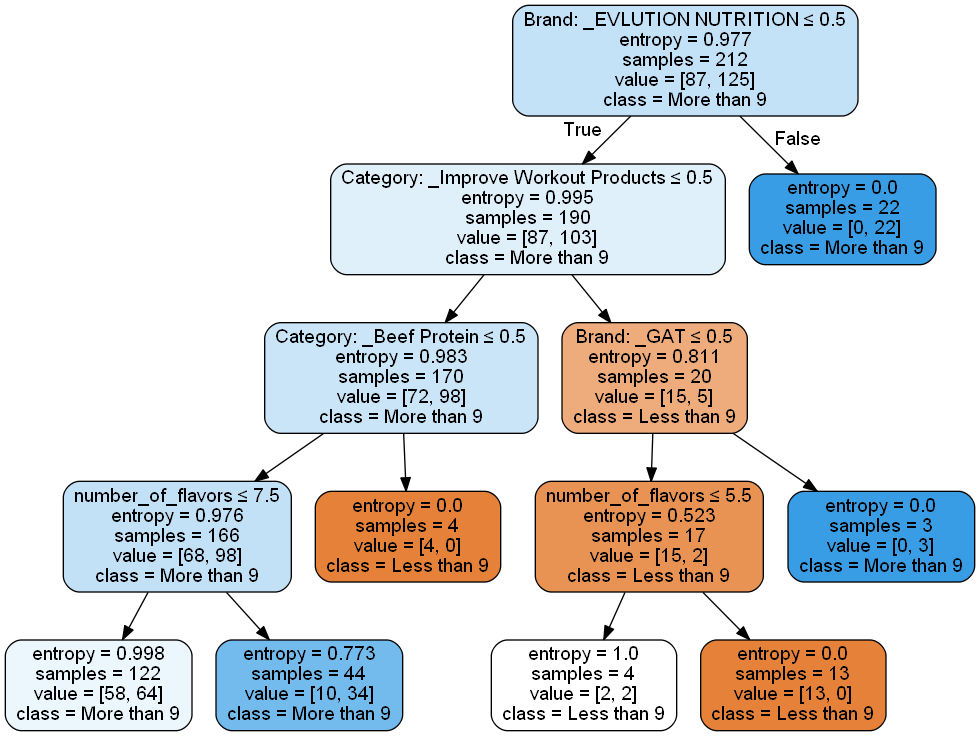

In [26]:
#Entropy
#Decision Tree (If reset, run above before)
#Summoning Machine
#Criterion and Max_Depth
tree_prod = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 1996) 

#Fitting the data
tree_prod = tree_prod.fit(X_train, Y_train)

#Predicting the response for test dataset
Y_pred = tree_prod.predict(X_test)

#Checking accuracy for products with review higher than 9
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

dot_data = StringIO()
export_graphviz(tree_prod, out_file = dot_data, filled = True, rounded = True,
               special_characters = True, feature_names = dt_feature_cols, 
                class_names = ["Less than 9", "More than 9"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Products2.png")
Image(graph.create_png())

# Naive Bayesian

In [27]:
#Preparing data
nb_prod = raw_prod.copy()
nb_prod.drop(["overall_rating", "product_description"], axis = 1, inplace = True)

In [28]:
nb_prod

,brand_name,number_of_flavors,price,product_category,label
0,EVLUTION NUTRITION,29.0,19.99,BCAAs,1
1,Optimum Nutrition,43.0,57.99,Build Muscle Products,1
2,JYM Supplement Science,9.0,48.99,Improve Workout Products,1
4,JYM Supplement Science,14.0,56.98,Whey Protein Isolate,1
7,EVLUTION NUTRITION,6.0,34.99,Betaine Anhydrous,1
...,...,...,...,...,...
819,Ascent,2.0,47.18,Micellar Casein Protein,0
824,Cellucor,10.0,16.99,Beta-Alanine,1
825,Ascent,4.0,75.80,Whey Protein Isolate,1
826,Isopure,2.0,41.07,Whey Protein Isolate,0


In [29]:
#Label Encoder for categories
#One_hot
onehot_brand = pd.get_dummies(nb_prod["brand_name"], prefix = "Brand: ")
onehot_category = pd.get_dummies(nb_prod["product_category"], prefix = "Category: ")
nb_prod = nb_prod.join(onehot_brand)
nb_prod = nb_prod.join(onehot_category)
nb_prod.columns

Index(['brand_name', 'number_of_flavors', 'price', 'product_category', 'label',
       'Brand: _ABB', 'Brand: _AST', 'Brand: _AllMax Nutrition',
       'Brand: _Animal', 'Brand: _Ascent', 'Brand: _BSN',
       'Brand: _Beast Sports Nutrition', 'Brand: _Betancourt Nutrition',
       'Brand: _Beverly International', 'Brand: _Body Nutrition',
       'Brand: _Bodybuilding.com Signature', 'Brand: _COBRA LABS',
       'Brand: _Cellucor', 'Brand: _Celsius', 'Brand: _Core Nutritionals',
       'Brand: _CytoSport', 'Brand: _Dymatize', 'Brand: _EFX Sports',
       'Brand: _EVLUTION NUTRITION', 'Brand: _FINAFLEX', 'Brand: _GAT',
       'Brand: _Gamma Labs', 'Brand: _Garden Of Life',
       'Brand: _Gaspari Nutrition', 'Brand: _Grenade', 'Brand: _Isopure',
       'Brand: _JYM Supplement Science', 'Brand: _Kaged Muscle',
       'Brand: _Labrada', 'Brand: _Lenny & Larry's', 'Brand: _MET-Rx',
       'Brand: _MHP', 'Brand: _MRM', 'Brand: _Magnum Nutraceuticals',
       'Brand: _Muscle Beach Nutrition'

In [30]:
#Creating Data
nb_feature_cols = ['number_of_flavors', 'price','Brand: _ABB', 'Brand: _AST', 'Brand: _AllMax Nutrition',
       'Brand: _Animal', 'Brand: _Ascent', 'Brand: _BSN',
       'Brand: _Beast Sports Nutrition', 'Brand: _Betancourt Nutrition',
       'Brand: _Beverly International', 'Brand: _Body Nutrition',
       'Brand: _Bodybuilding.com Signature', 'Brand: _COBRA LABS',
       'Brand: _Cellucor', 'Brand: _Celsius', 'Brand: _Core Nutritionals',
       'Brand: _CytoSport', 'Brand: _Dymatize', 'Brand: _EFX Sports',
       'Brand: _EVLUTION NUTRITION', 'Brand: _FINAFLEX', 'Brand: _GAT',
       'Brand: _Gamma Labs', 'Brand: _Garden Of Life',
       'Brand: _Gaspari Nutrition', 'Brand: _Grenade', 'Brand: _Isopure',
       'Brand: _JYM Supplement Science', 'Brand: _Kaged Muscle',
       'Brand: _Labrada', '''Brand: _Lenny & Larry's''', 'Brand: _MET-Rx',
       'Brand: _MHP', 'Brand: _MRM', 'Brand: _Magnum Nutraceuticals',
       'Brand: _Muscle Beach Nutrition', 'Brand: _Muscle Milk',
       'Brand: _MuscleMeds', 'Brand: _MuscleTech', 'Brand: _NLA for Her',
       'Brand: _NOW', 'Brand: _NutraBio', 'Brand: _ONE',
       'Brand: _OhYeah! Nutrition', 'Brand: _Optimum Nutrition',
       'Brand: _PEScience', 'Brand: _PrimaForce', 'Brand: _Pro Supps',
       'Brand: _Quest Nutrition', 'Brand: _RSP Nutrition', 'Brand: _S.A.N.',
       'Brand: _Six Star Pro Nutrition', 'Brand: _Sports Research',
       'Brand: _Top Secret Nutrition', 'Brand: _Universal Nutrition',
       'Brand: _Vega', 'Brand: _eFlow Nutrition', 'Brand: _iForce Nutrition',
       'Brand: _iSatori', 'Category: _Agmatine', 'Category: _Amino Acids',
       'Category: _BCAAs', 'Category: _Beef Protein',
       'Category: _Beta-Alanine', 'Category: _Betaine Anhydrous',
       'Category: _Build Muscle Products', 'Category: _Caffeine',
       'Category: _Carbohydrates', 'Category: _Citrulline',
       'Category: _Collagen', 'Category: _Creatine', 'Category: _Creatine HCl',
       'Category: _Creatine Malate', 'Category: _Creatine Monohydrate',
       'Category: _D-Aspartic Acid', 'Category: _Egg Protein',
       'Category: _GABA', 'Category: _Glutamine',
       'Category: _Green Coffee Extract', 'Category: _Green Tea',
       'Category: _Hydrolyzed Whey Protein',
       'Category: _Improve Workout Products', 'Category: _Kre-Alkalyn',
       'Category: _L-Arginine', 'Category: _L-Taurine',
       'Category: _Micellar Casein Protein', 'Category: _Plant Protein',
       'Category: _Protein', 'Category: _Waxy Maize',
       'Category: _Weight Loss Products', 'Category: _Whey Protein',
       'Category: _Whey Protein Blends', 'Category: _Whey Protein Concentrate',
       'Category: _Whey Protein Isolate', 'Category: _Yerba Mate']
nb_X = dt_prod[dt_feature_cols]
nb_Y = dt_prod.label




In [63]:
#Splitting
X_train, X_test, Y_train, Y_test = train_test_split(nb_X, nb_Y, test_size = 0.3, random_state = 1996)


In [64]:
#Standardizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
#Doing Naive Bayesian
NB_machine = GaussianNB()

NB_machine = NB_machine.fit(X_train, Y_train)

Y_pred = NB_machine.predict(X_test)


In [66]:
#Evaluating the NB
print("Confusion Matrix NB : \n", metrics.confusion_matrix(Y_test, Y_pred),"\n")
print("The precision for NB is ", metrics.precision_score(Y_test, Y_pred)) 
print("The recall for NB is ", metrics.recall_score(Y_test, Y_pred),"\n")
print("The accuracy for NB is ", metrics.accuracy_score(Y_test, Y_pred),"\n")
print("The error rate for NB is ", (1 - metrics.accuracy_score(Y_test, Y_pred)),"\n")
print("The F-score for NB is ", metrics.f1_score(Y_test, Y_pred),"\n")

Confusion Matrix NB : 
 [[26  6]
 [35 24]] 

The precision for NB is  0.8
The recall for NB is  0.4067796610169492 

The accuracy for NB is  0.5494505494505495 

The error rate for NB is  0.4505494505494505 

The F-score for NB is  0.5393258426966292 



In [72]:
imps = sklearn.inspection.permutation_importance(NB_machine, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

#Feature Ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, nb_feature_cols[indices[f]], importances[indices[f]]))

Feature ranking:
1. Brand: _EVLUTION NUTRITION (0.035165)
2. Brand: _JYM Supplement Science (0.021978)
3. Brand: _Cellucor (0.021978)
4. Brand: _Labrada (0.017582)
5. Brand: _eFlow Nutrition (0.015385)
6. Brand: _Six Star Pro Nutrition (0.015385)
7. Brand: _Muscle Beach Nutrition (0.013187)
8. Brand: _ABB (0.013187)
9. Brand: _Beast Sports Nutrition (0.013187)
10. Category: _Plant Protein (0.010989)
11. Brand: _Core Nutritionals (0.010989)
12. Brand: _Quest Nutrition (0.008791)
13. Category: _Caffeine (0.008791)
14. Category: _Build Muscle Products (0.008791)
15. Category: _Creatine HCl (0.008791)
16. Brand: _Universal Nutrition (0.006593)
17. Category: _Glutamine (0.004396)
18. Category: _Whey Protein (0.004396)
19. Brand: _CytoSport (0.004396)
20. Category: _Green Tea (0.004396)
21. Category: _Whey Protein Isolate (0.002198)
22. Category: _Green Coffee Extract (0.002198)
23. Brand: _Animal (0.002198)
24. Brand: _Kaged Muscle (0.002198)
25. Brand: _PEScience (0.000000)
26. Category: _

In [40]:
#Calibration

Cal_NB_machine = CalibratedClassifierCV(NB_machine, cv = None, method = "isotonic")

Cal_NB_machine = Cal_NB_machine.fit(X_train, Y_train)

Y_pred = Cal_NB_machine.predict(X_test)


In [41]:
#Evaluating the NB
print("Confusion Matrix for Calibrated NB : \n", metrics.confusion_matrix(Y_test, Y_pred),"\n")
print("The precision for NB is ", metrics.precision_score(Y_test, Y_pred)) 
print("The recall for NB is ", metrics.recall_score(Y_test, Y_pred),"\n")
print("The accuracy for NB is ", metrics.accuracy_score(Y_test, Y_pred),"\n")
print("The error rate for NB is ", (1 - metrics.accuracy_score(Y_test, Y_pred)),"\n")
print("The F-score for NB is ", metrics.f1_score(Y_test, Y_pred),"\n")

Confusion Matrix for Calibrated NB : 
 [[19 13]
 [25 34]] 

The precision for NB is  0.723404255319149
The recall for NB is  0.576271186440678 

The accuracy for NB is  0.5824175824175825 

The error rate for NB is  0.41758241758241754 

The F-score for NB is  0.6415094339622641 



# SVM Text

In [38]:
#Preparing data
svm_prod = raw_prod.copy()
svm_prod.drop(["brand_name", "number_of_flavors", "price", "product_category","overall_rating",], axis = 1, inplace = True)

In [39]:
svm_prod

,product_description,label
0,BCAA Powder with Natural Energizers Sourced fr...,1
1,24g of Whey Protein with Amino Acids for Muscl...,1
2,Pre-Workout Powder Powerhouse Packed with 13-H...,1
4,"24g of Pure, Quality Protein in Every Scoop wi...",1
7,Advanced Pre-Workout + Weight Management,1
...,...,...
819,Slow And Sustained Release To Keep Muscles Fed...,0
824,"Pre-Mix Pre-Workout for Energy, Focus and Ulti...",1
825,Made with Zero Artificial Ingredients and Nati...,1
826,Natural!,0


In [40]:
#NLP and SVM packages
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm

In [41]:
#Text Preprocessing
#Putting all in lowercase
svm_prod["product_description"] = [entry.lower() for entry in svm_prod["product_description"]]

#Tokenization
svm_prod["product_description"] = [word_tokenize(entry) for entry in svm_prod["product_description"]]



In [42]:
#Removing stop words
stop = stopwords.words("english")


def remove_stop(entry):
    stop = stopwords.words("english")
    word_list = []
    for word in entry:
        if word not in stop:
            word_list.append(word)
    return word_list

svm_prod["tkn_no_sw"] = svm_prod["product_description"].apply(
    lambda entry: remove_stop(entry)) 


In [43]:
#Removing Scpecial characters

def remove_punct(entry):
    sp_chars = punctuation
    word_list = []
    for word in entry:
        true_list = []
        for char in word:
            if char in punctuation:
                true_list.append(False)
            else:
                true_list.append(True)
        if False not in true_list:
            word_list.append(word)
    return word_list


svm_prod["tkn_no_sw_p"] = svm_prod["tkn_no_sw"].apply(
    lambda entry: remove_punct(entry)) 


In [44]:
#Removing numbers

def remove_numb(entry):
    numb_chars = "0123456789"
    word_list = []
    for word in entry:
        true_list = []
        for char in word:
            if char in numb_chars:
                true_list.append(False)
            else:
                true_list.append(True)
        if False not in true_list:
            word_list.append(word)
    return word_list

svm_prod["tkn_no_sw_p_nb"] = svm_prod["tkn_no_sw_p"].apply(
    lambda entry: remove_numb(entry)) 



In [45]:
#Stemming?

def WNL(entry):
    lemmatizer = WordNetLemmatizer()
    
    word_list = []
    for word in entry:
        lem_word = lemmatizer.lemmatize(word)
        word_list.append(lem_word)
    return word_list

svm_prod["tkn_lemm"] = svm_prod["tkn_no_sw_p_nb"].apply(
    lambda entry: WNL(entry)) 
        




In [46]:
svm_prod

,product_description,label,tkn_no_sw,tkn_no_sw_p,tkn_no_sw_p_nb,tkn_lemm
0,"[bcaa, powder, with, natural, energizers, sour...",1,"[bcaa, powder, natural, energizers, sourced, g...","[bcaa, powder, natural, energizers, sourced, g...","[bcaa, powder, natural, energizers, sourced, g...","[bcaa, powder, natural, energizer, sourced, gr..."
1,"[24g, of, whey, protein, with, amino, acids, f...",1,"[24g, whey, protein, amino, acids, muscle, rec...","[24g, whey, protein, amino, acids, muscle, rec...","[whey, protein, amino, acids, muscle, recovery]","[whey, protein, amino, acid, muscle, recovery]"
2,"[pre-workout, powder, powerhouse, packed, with...",1,"[pre-workout, powder, powerhouse, packed, 13-h...","[powder, powerhouse, packed, picked, ingredien...","[powder, powerhouse, packed, picked, ingredien...","[powder, powerhouse, packed, picked, ingredien..."
4,"[24g, of, pure, ,, quality, protein, in, every...",1,"[24g, pure, ,, quality, protein, every, scoop,...","[24g, pure, quality, protein, every, scoop, ad...","[pure, quality, protein, every, scoop, added, ...","[pure, quality, protein, every, scoop, added, ..."
7,"[advanced, pre-workout, +, weight, management]",1,"[advanced, pre-workout, +, weight, management]","[advanced, weight, management]","[advanced, weight, management]","[advanced, weight, management]"
...,...,...,...,...,...,...
819,"[slow, and, sustained, release, to, keep, musc...",0,"[slow, sustained, release, keep, muscles, fed,...","[slow, sustained, release, keep, muscles, fed,...","[slow, sustained, release, keep, muscles, fed,...","[slow, sustained, release, keep, muscle, fed, ..."
824,"[pre-mix, pre-workout, for, energy, ,, focus, ...",1,"[pre-mix, pre-workout, energy, ,, focus, ultim...","[energy, focus, ultimate, convenience]","[energy, focus, ultimate, convenience]","[energy, focus, ultimate, convenience]"
825,"[made, with, zero, artificial, ingredients, an...",1,"[made, zero, artificial, ingredients, native, ...","[made, zero, artificial, ingredients, native, ...","[made, zero, artificial, ingredients, native, ...","[made, zero, artificial, ingredient, native, w..."
826,"[natural, !]",0,"[natural, !]",[natural],[natural],[natural]


In [48]:
svm_prod["clean"] = svm_prod["tkn_lemm"].apply(lambda entry: " ".join(entry))
svm_final = svm_prod[["label", "clean"]]


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [50]:
svm_final.loc[4, "clean"]

'pure quality protein every scoop added amino acid filler nutrient'

In [52]:
#Splitting the data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(svm_final['clean'],svm_final['label'],test_size=0.3, random_state = 1996)

In [53]:
#Word Vectorization aka TermDocumentMatrix and Term Frequency Inverse Document
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(svm_final['clean'])  #TFID tokenizes on itself, so need to regroup

X_train_Tfidf = Tfidf_vect.transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)




In [54]:
#SVM Machine
SV_prod = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SV_prod.fit(X_train_Tfidf, Y_train)

#prediction
Y_pred = SV_prod.predict(X_test_Tfidf)


In [55]:
print(str(SV_prod.coef_))

  (0, 222)	0.29390150060925657
  (0, 81)	0.27885273924492837
  (0, 80)	0.1224871425698392
  (0, 273)	0.5409880529664709
  (0, 151)	0.5045743527574137
  (0, 72)	0.45869851596911654
  (0, 183)	0.43234100460133473
  (0, 104)	0.43234100460133473
  (0, 54)	0.22118319795237343
  (0, 189)	0.43521502188024225
  (0, 169)	0.43521502188024225
  (0, 135)	0.43521502188024225
  (0, 212)	0.24963008926939578
  (0, 11)	0.5797706277264328
  (0, 2)	0.5797706277264328
  (0, 238)	0.9557344456476344
  (0, 260)	0.39321623882873713
  (0, 91)	0.612842645455558
  (0, 6)	0.39321623882873713
  (0, 28)	0.9478126505413083
  (0, 26)	0.9478126505413083
  (0, 216)	0.4096420241255165
  (0, 109)	0.4096420241255165
  (0, 84)	0.4096420241255165
  (0, 165)	0.1272219760674679
  :	:
  (0, 44)	0.43383194066677977
  (0, 246)	-0.31006586531856106
  (0, 240)	-0.7839057086182566
  (0, 173)	-0.5164734447656214
  (0, 139)	-0.0060401626250568
  (0, 87)	0.684008245363187
  (0, 68)	-0.9270619355709491
  (0, 39)	-0.5164734447656214
  (

In [56]:
sorted_coeff = SV_prod.coef_.toarray()
coeff_df = pd.DataFrame(sorted_coeff, index = ["Coefficient"])
coeff_df = coeff_df.T
dict_code = pd.Series(range(0,277))
coeff_df["dict_code"] = dict_code

#Unwrangling the Vocabulary of the matrix
res = dict((v,k) for k,v in Tfidf_vect.vocabulary_.items())

coeff_df["word"] = coeff_df["dict_code"].map(lambda code : res[code])

#Order of columns and sorting
#coeff_df.order(by = "")


In [57]:
coeff_df.sort_values(by = "Coefficient")

,Coefficient,dict_code,word
127,-1.291921,127,isolate
180,-1.260142,180,performance
199,-1.221891,199,promote
270,-1.218296,270,weight
164,-1.078959,164,nighttime
...,...,...,...
257,1.164544,257,ultimate
76,1.186543,76,energy
201,1.186552,201,protein
23,1.515921,23,bcaas


In [165]:
coeff_df

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,-0.575407,0.0,0.579771,-0.68245,-0.512045,0.587581,0.393216,-0.882517,-0.349016,-0.519297,...,0.0,0.0,0.455858,-1.218296,0.603276,0.0,0.540988,0.531346,-0.549636,0.760287


In [130]:
print(Tfidf_vect.vocabulary_)

{'bcaa': 22, 'powder': 191, 'natural': 161, 'energizer': 75, 'sourced': 234, 'green': 107, 'coffee': 50, 'tea': 248, 'support': 242, 'focus': 93, 'whey': 271, 'protein': 201, 'amino': 11, 'acid': 2, 'muscle': 158, 'recovery': 212, 'powerhouse': 194, 'packed': 175, 'picked': 185, 'ingredient': 122, 'improved': 118, 'pure': 205, 'quality': 207, 'every': 81, 'scoop': 222, 'added': 5, 'filler': 91, 'nutrient': 167, 'advanced': 7, 'weight': 270, 'management': 143, 'intense': 125, 'increased': 121, 'energy': 76, 'power': 192, 'bcaas': 23, 'zero': 276, 'sugar': 238, 'calorie': 38, 'essential': 80, 'formulated': 95, 'caffeine': 37, 'source': 233, 'building': 35, 'lean': 133, 'crispy': 62, 'bar': 20, 'provides': 203, 'gram': 105, 'per': 178, 'turn': 256, 'workout': 274, 'intensity': 126, 'increase': 120, 'performance': 180, 'revolutionary': 219, 'formula': 94, 'bigger': 28, 'better': 26, 'science': 221, 'based': 21, 'testosterone': 250, 'fuel': 97, 'pharmaceutical': 183, 'grade': 104, 'microniz

In [131]:
res = dict((v,k) for k,v in Tfidf_vect.vocabulary_.items())

In [58]:
#Evaluating the NB
print("Confusion Matrix for SVM : \n", metrics.confusion_matrix(Y_test, Y_pred),"\n")
print("The precision for SVM is ", metrics.precision_score(Y_test, Y_pred)) 
print("The recall for SVM is ", metrics.recall_score(Y_test, Y_pred),"\n")
print("The accuracy for SVM is ", metrics.accuracy_score(Y_test, Y_pred),"\n")
print("The error rate for SVM is ", (1 - metrics.accuracy_score(Y_test, Y_pred)),"\n")
print("The F-score for SVM is ", metrics.f1_score(Y_test, Y_pred),"\n")

Confusion Matrix for SVM : 
 [[16 16]
 [13 46]] 

The precision for SVM is  0.7419354838709677
The recall for SVM is  0.7796610169491526 

The accuracy for SVM is  0.6813186813186813 

The error rate for SVM is  0.31868131868131866 

The F-score for SVM is  0.7603305785123968 



In [12]:
raw_prod["label"].value_counts()

1    184
0    119
Name: label, dtype: int64

In [14]:
raw_prod.groupby("label")["price"].mean()


label
0    35.088487
1    33.855870
Name: price, dtype: float64

In [122]:
#Opportunity Cost
raw_prod["Potential Sales"] = raw_prod["label"].map(lambda x: 1400 if x == 1 else 1000)
raw_prod["Total Revenue"] = raw_prod["Potential Sales"] * raw_prod["price"]
raw_prod.groupby("label")["Total Revenue"].mean()


label
0    35088.487395
1    47398.217391
Name: Total Revenue, dtype: float64

In [17]:
raw_prod.describe()

,number_of_flavors,overall_rating,price,label
count,303.000000,303.000000,303.000000,303.000000
mean,7.033003,8.976568,34.339967,0.607261
std,7.718918,0.550928,19.152406,0.489168
min,1.000000,5.700000,3.050000,0.000000
25%,2.000000,8.700000,20.480000,0.000000
50%,5.000000,9.100000,31.450000,1.000000
75%,9.000000,9.300000,43.895000,1.000000
max,43.000000,10.000000,119.530000,1.000000


In [20]:
raw_prod["brand_name"].value_counts()

Optimum Nutrition             33
EVLUTION NUTRITION            27
Universal Nutrition           18
AllMax Nutrition              14
Isopure                       14
Cellucor                      13
BSN                           12
Dymatize                      10
RSP Nutrition                  9
GAT                            9
Animal                         8
MuscleTech                     8
PEScience                      7
MET-Rx                         6
NOW                            6
MRM                            6
ABB                            6
NutraBio                       5
MuscleMeds                     5
Kaged Muscle                   5
Quest Nutrition                5
Beverly International          4
Vega                           4
Muscle Milk                    4
JYM Supplement Science         4
Six Star Pro Nutrition         4
Muscle Beach Nutrition         3
Ascent                         3
Labrada                        3
Gaspari Nutrition              3
EFX Sports

In [23]:
raw_prod["product_category"].value_counts()

Whey Protein                68
Creatine Monohydrate        31
Whey Protein Isolate        29
Improve Workout Products    26
Beta-Alanine                19
Build Muscle Products       15
Plant Protein               13
Protein                      9
Micellar Casein Protein      8
Caffeine                     8
Whey Protein Blends          7
Citrulline                   6
BCAAs                        6
Amino Acids                  6
Glutamine                    5
Whey Protein Concentrate     5
Beef Protein                 5
Weight Loss Products         4
Hydrolyzed Whey Protein      4
D-Aspartic Acid              3
Kre-Alkalyn                  3
Green Tea                    3
L-Arginine                   3
Green Coffee Extract         2
Creatine HCl                 2
Agmatine                     2
Egg Protein                  2
Waxy Maize                   1
GABA                         1
L-Taurine                    1
Creatine                     1
Yerba Mate                   1
Betaine 